In [1]:
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import uproot
import os

timestamps = {}

for station in os.listdir('/cr/tempdata01/filip/iRODS/UubRandoms/converted/timestamps'):
    
    start, stop = np.inf, -np.inf
    for file in np.loadtxt(f"/cr/tempdata01/filip/iRODS/UubRandoms/converted/timestamps/{station}", usecols=[1, 2]):
        if file[0] < start: start = file[0]
        if file[1] > stop: stop = file[1]
    
    timestamps[station[:-4]] = (start, stop)

StationIDs = set({'NuriaJr' : 56, 'Peru' : 1737, 'Granada' : 1738, 'Jaco' : 1742, 'LeQuiDon' : 1744, 'RukaMalen' : -1, 'Svenja' : 1733}.values())

print(StationIDs)

{1733, 1737, 1738, 1742, 1744, 56, -1}


# Looking at Online Monitoring

In [19]:
t = []
VEMPeak = [[[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []]]

for day in [16, 17, 18]:

    file = uproot.open(f"/cr/tempdata01/filip/SSDCalib/Monit/mc_2022_11_{day}_00h00.root")
    for j, station in enumerate(StationIDs):
        points = np.argwhere(file["SDMonCal/SDMonCalBranch/fLsId"].array() == station)
        points = [i for l in points for i in l]

        vem = file["SDMonCal/SDMonCalBranch/fCalibration/fCalibration.fPeak[3]"].array()[points]
        VEMPeak[j][0].append(vem[:,0])
        VEMPeak[j][1].append(vem[:,1])
        VEMPeak[j][2].append(vem[:,2])
            
        VEMPeak[j][0] = [i for l in VEMPeak[0] for i in l]
        VEMPeak[j][1] = [i for l in VEMPeak[1] for i in l]
        VEMPeak[j][2] = [i for l in VEMPeak[2] for i in l]

    t.append(file["SDMonCal/fTime"].array())
t = [i for l in t for i in l]

# Looking at the production data (= recostructed events)

In [3]:
# Find out if tanks in question participated in any events
for day in [14, 15, 16, 17]:
    file = uproot.open(f"/cr/tempdata01/filip/iRODS/MonitoringData/SD_2022_11_{day}_adst.root")
    for i, event in enumerate(file["recData/event./event.fSDEvent/event.fSDEvent.fStations/event.fSDEvent.fStations.fId"].array()):
        if set(event).intersection(StationIDs): print(event)

1034108 40


/cr/users/filip/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: x and y must have same first dimension, but have shapes (1034108,) and (40,)

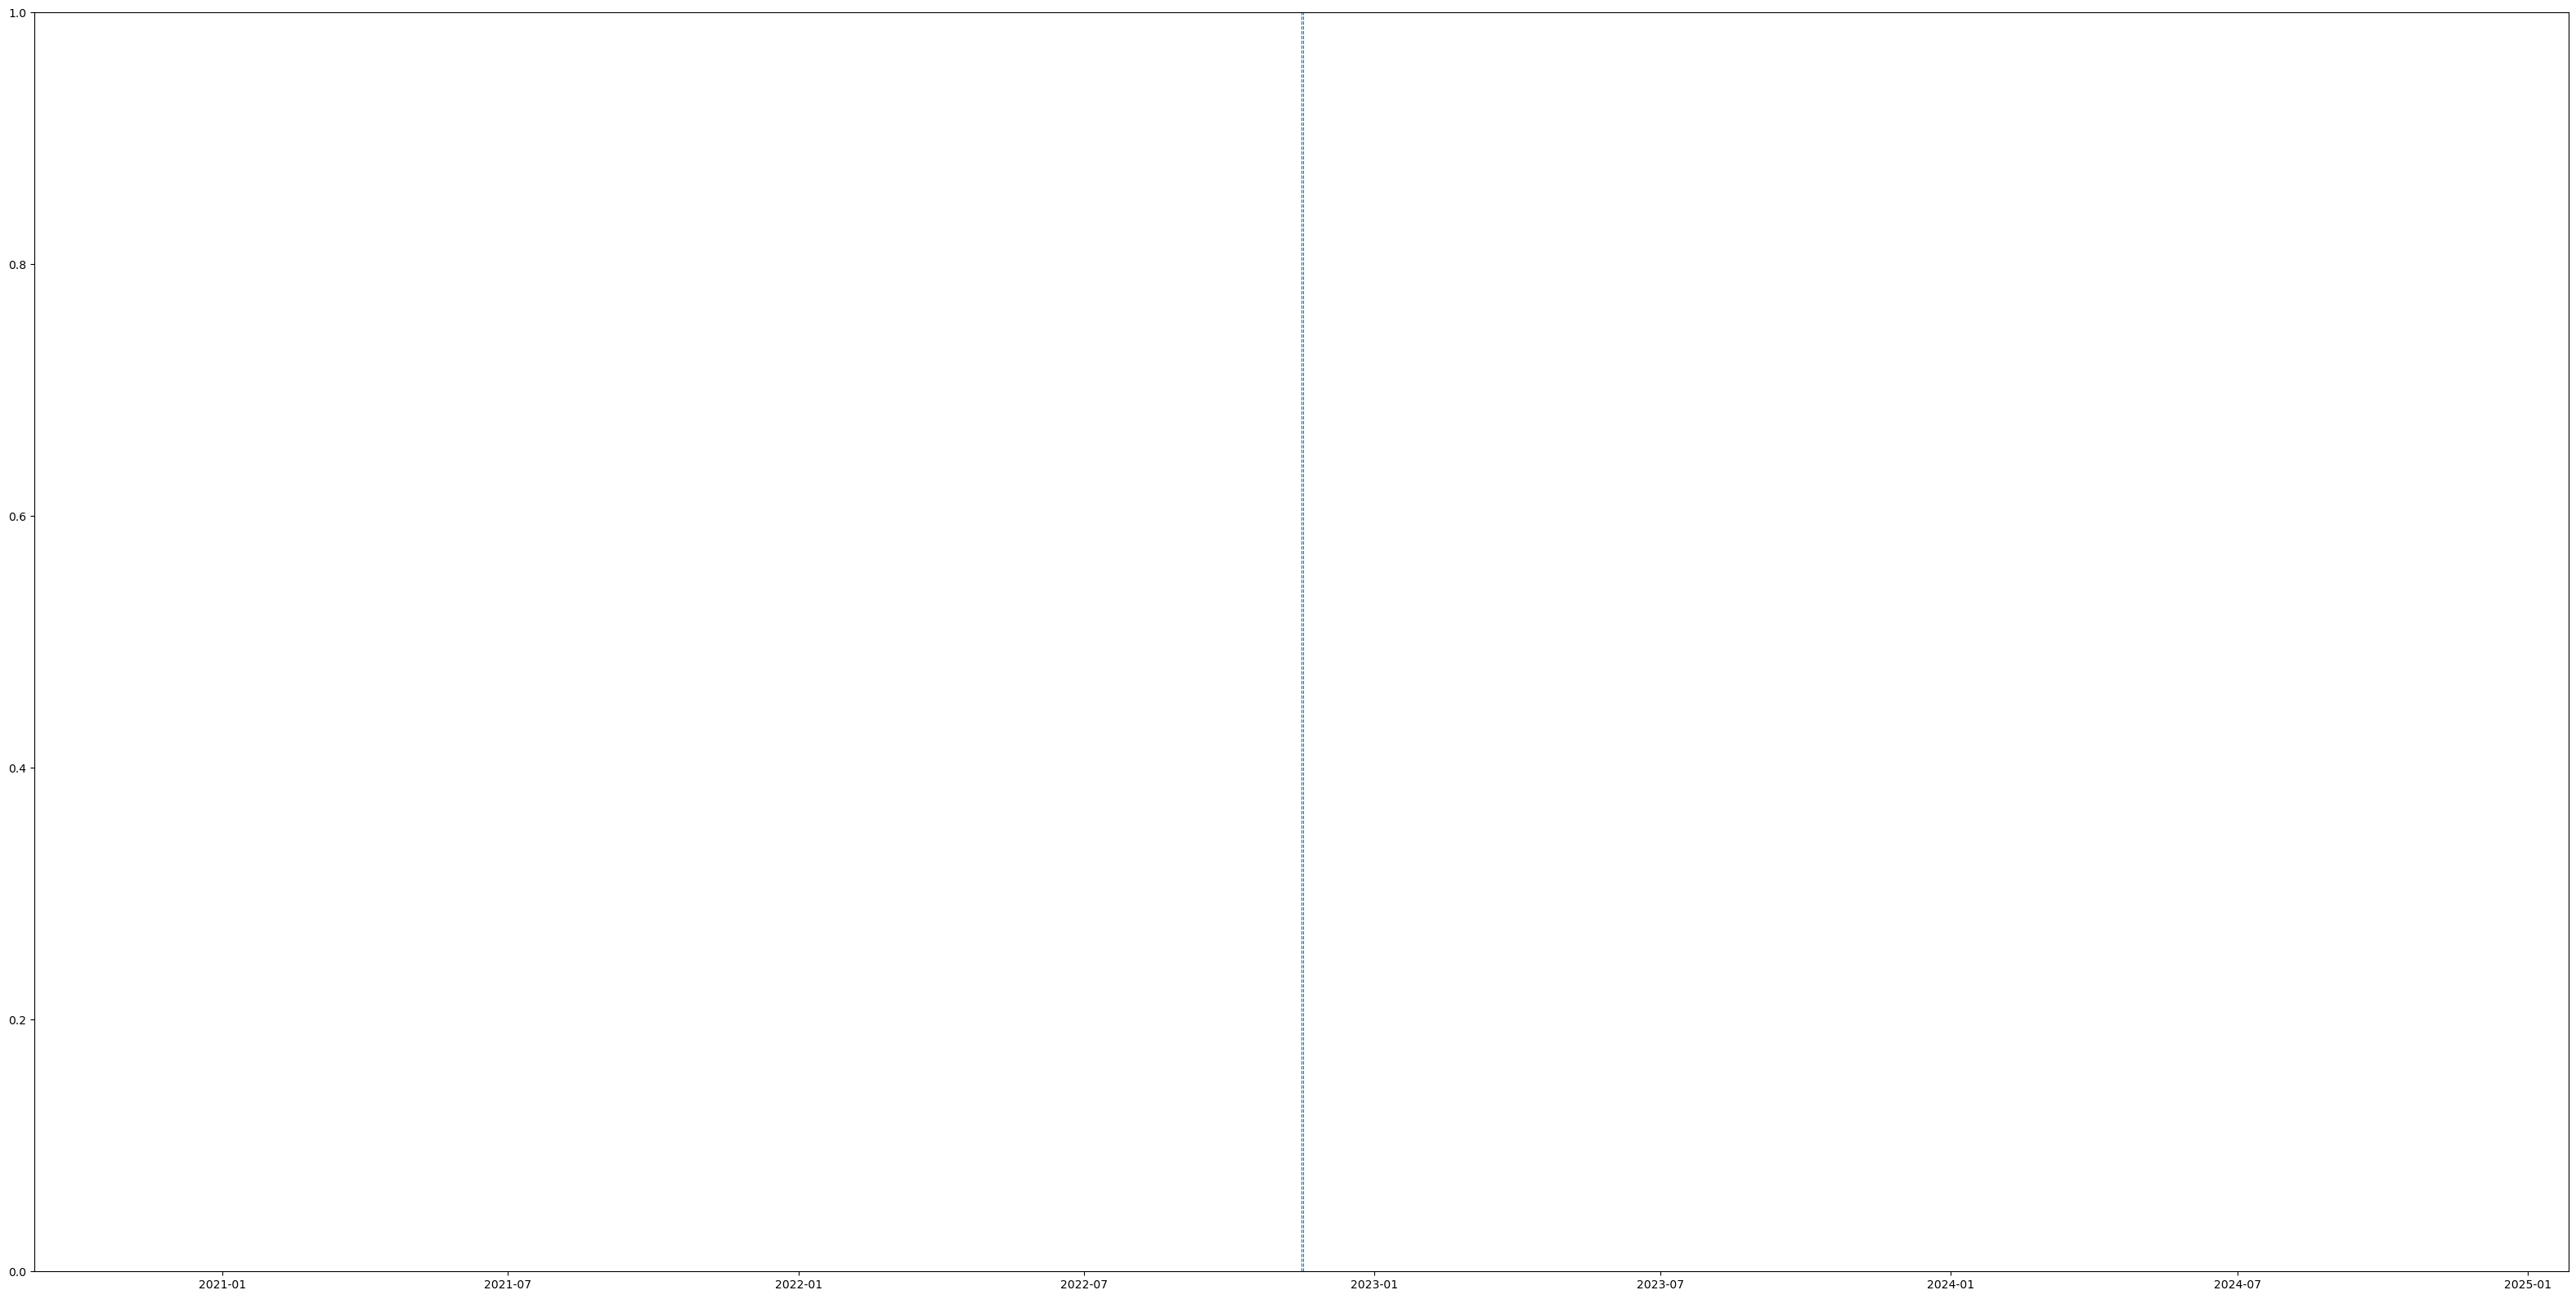

In [20]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['figure.figsize'] = [40, 20]

for i, (station, (start, stop)) in enumerate(timestamps.items()):
    plt.axvline(dt.datetime.fromtimestamp(start), ls = '--', lw = 0.8, color = cycle[i], label=station)
    plt.axvline(dt.datetime.fromtimestamp(stop), ls = '--', lw = 0.8, color = cycle[i])

    print(len(t), len(VEMPeak[i][0]))

    plt.plot(t, VEMPeak[i][0], ls="solid", color = cycle[i])
    plt.plot(t, VEMPeak[i][1], ls="dashed", color = cycle[i])
    plt.plot(t, VEMPeak[i][2], ls="dotted", color = cycle[i])

print("Start:", dt.datetime.fromtimestamp(min([i[0] for i in timestamps.values()])))
print("Stop :", dt.datetime.fromtimestamp(max([i[1] for i in timestamps.values()])))

#_ = plt.xlim(dt.datetime.fromtimestamp(min([i[0] for i in timestamps.values()]) - 3600), dt.datetime.fromtimestamp(max([i[1] for i in timestamps.values()]) + 3600))

plt.legend()

# Looking at all T3s, maybe something is appearing there?

In [7]:
# Find out if tanks in question participated in any events
for day in [15, 16]:
    file = uproot.open(f"/cr/tempdata01/filip/iRODS/MonitoringData/ad_2022_11_{day}_12h00.root")

    for item in file.keys():
        if 'Sd-only' in item:
            print(item.__dir__())

            break
    
    #for key, val in file.items():
    #    print(val)

    #for i, event in enumerate(file["recData/event./event.fSDEvent/event.fSDEvent.fStations/event.fSDEvent.fStations.fId"].array()):
    #   if set(event).intersection(StationIDs): print(event)

    break

['__repr__', '__hash__', '__str__', '__getattribute__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__iter__', '__mod__', '__rmod__', '__len__', '__getitem__', '__add__', '__mul__', '__rmul__', '__contains__', '__new__', 'encode', 'replace', 'split', 'rsplit', 'join', 'capitalize', 'casefold', 'title', 'center', 'count', 'expandtabs', 'find', 'partition', 'index', 'ljust', 'lower', 'lstrip', 'rfind', 'rindex', 'rjust', 'rstrip', 'rpartition', 'splitlines', 'strip', 'swapcase', 'translate', 'upper', 'startswith', 'endswith', 'removeprefix', 'removesuffix', 'isascii', 'islower', 'isupper', 'istitle', 'isspace', 'isdecimal', 'isdigit', 'isnumeric', 'isalpha', 'isalnum', 'isidentifier', 'isprintable', 'zfill', 'format', 'format_map', '__format__', 'maketrans', '__sizeof__', '__getnewargs__', '__doc__', '__setattr__', '__delattr__', '__init__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__dir__', '__class__']
